# 1. Importing Libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

# 2. Reading Dataset and Understanding the Data

In [2]:
#Reading  the csv file using pandas

df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

There are 1460 rows and 81 columns

In [5]:
# Checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 3. Data Cleaning

In [6]:
#Missing values
count=df.isnull().sum()
print(count)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Displaying the column names that have missing values
col_name = df.columns[df.isnull().any()]
col_name

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
# check the amount of missing values in the columns
columns_nan =  col_name

for c in columns_nan:
    print(c, df[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
#check the percentage of missing data to make decisions on working with the missing data
null_val = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
null_val.index.name = 'Feature names'
null_val.head(30)

,Null values in %
Feature names,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


## 3.1 Insight into missing values

There are five columns that have considerable data values missing. The decision was made to drop these columns. Pool, Fence and Fireplace are all features 
that could be added to or removed from an existing property should it be desired.

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.2 Cleaning the Dataset

In [12]:
# Dropping all columns with 25% and more missing values
for col in columns_nan:
    if df[col].isnull().sum()*100/df.shape[0]>25:
        df.drop(col,1, inplace=True)

In [13]:
df.shape

(1460, 76)

In [14]:
# dropping the 'Id' column
df.drop(['Id'], axis=1, inplace=True)
df.shape

(1460, 75)

In [15]:
df.shape

(1460, 75)

In [16]:
# Checking for columns with unique values less than 2
unique_values = df.nunique()
unique_values[unique_values < 2]

Series([], dtype: int64)

These six Columns are dropped: PoolQC, Fence, MiscFeature, Alley, FireplaceQu ,Id

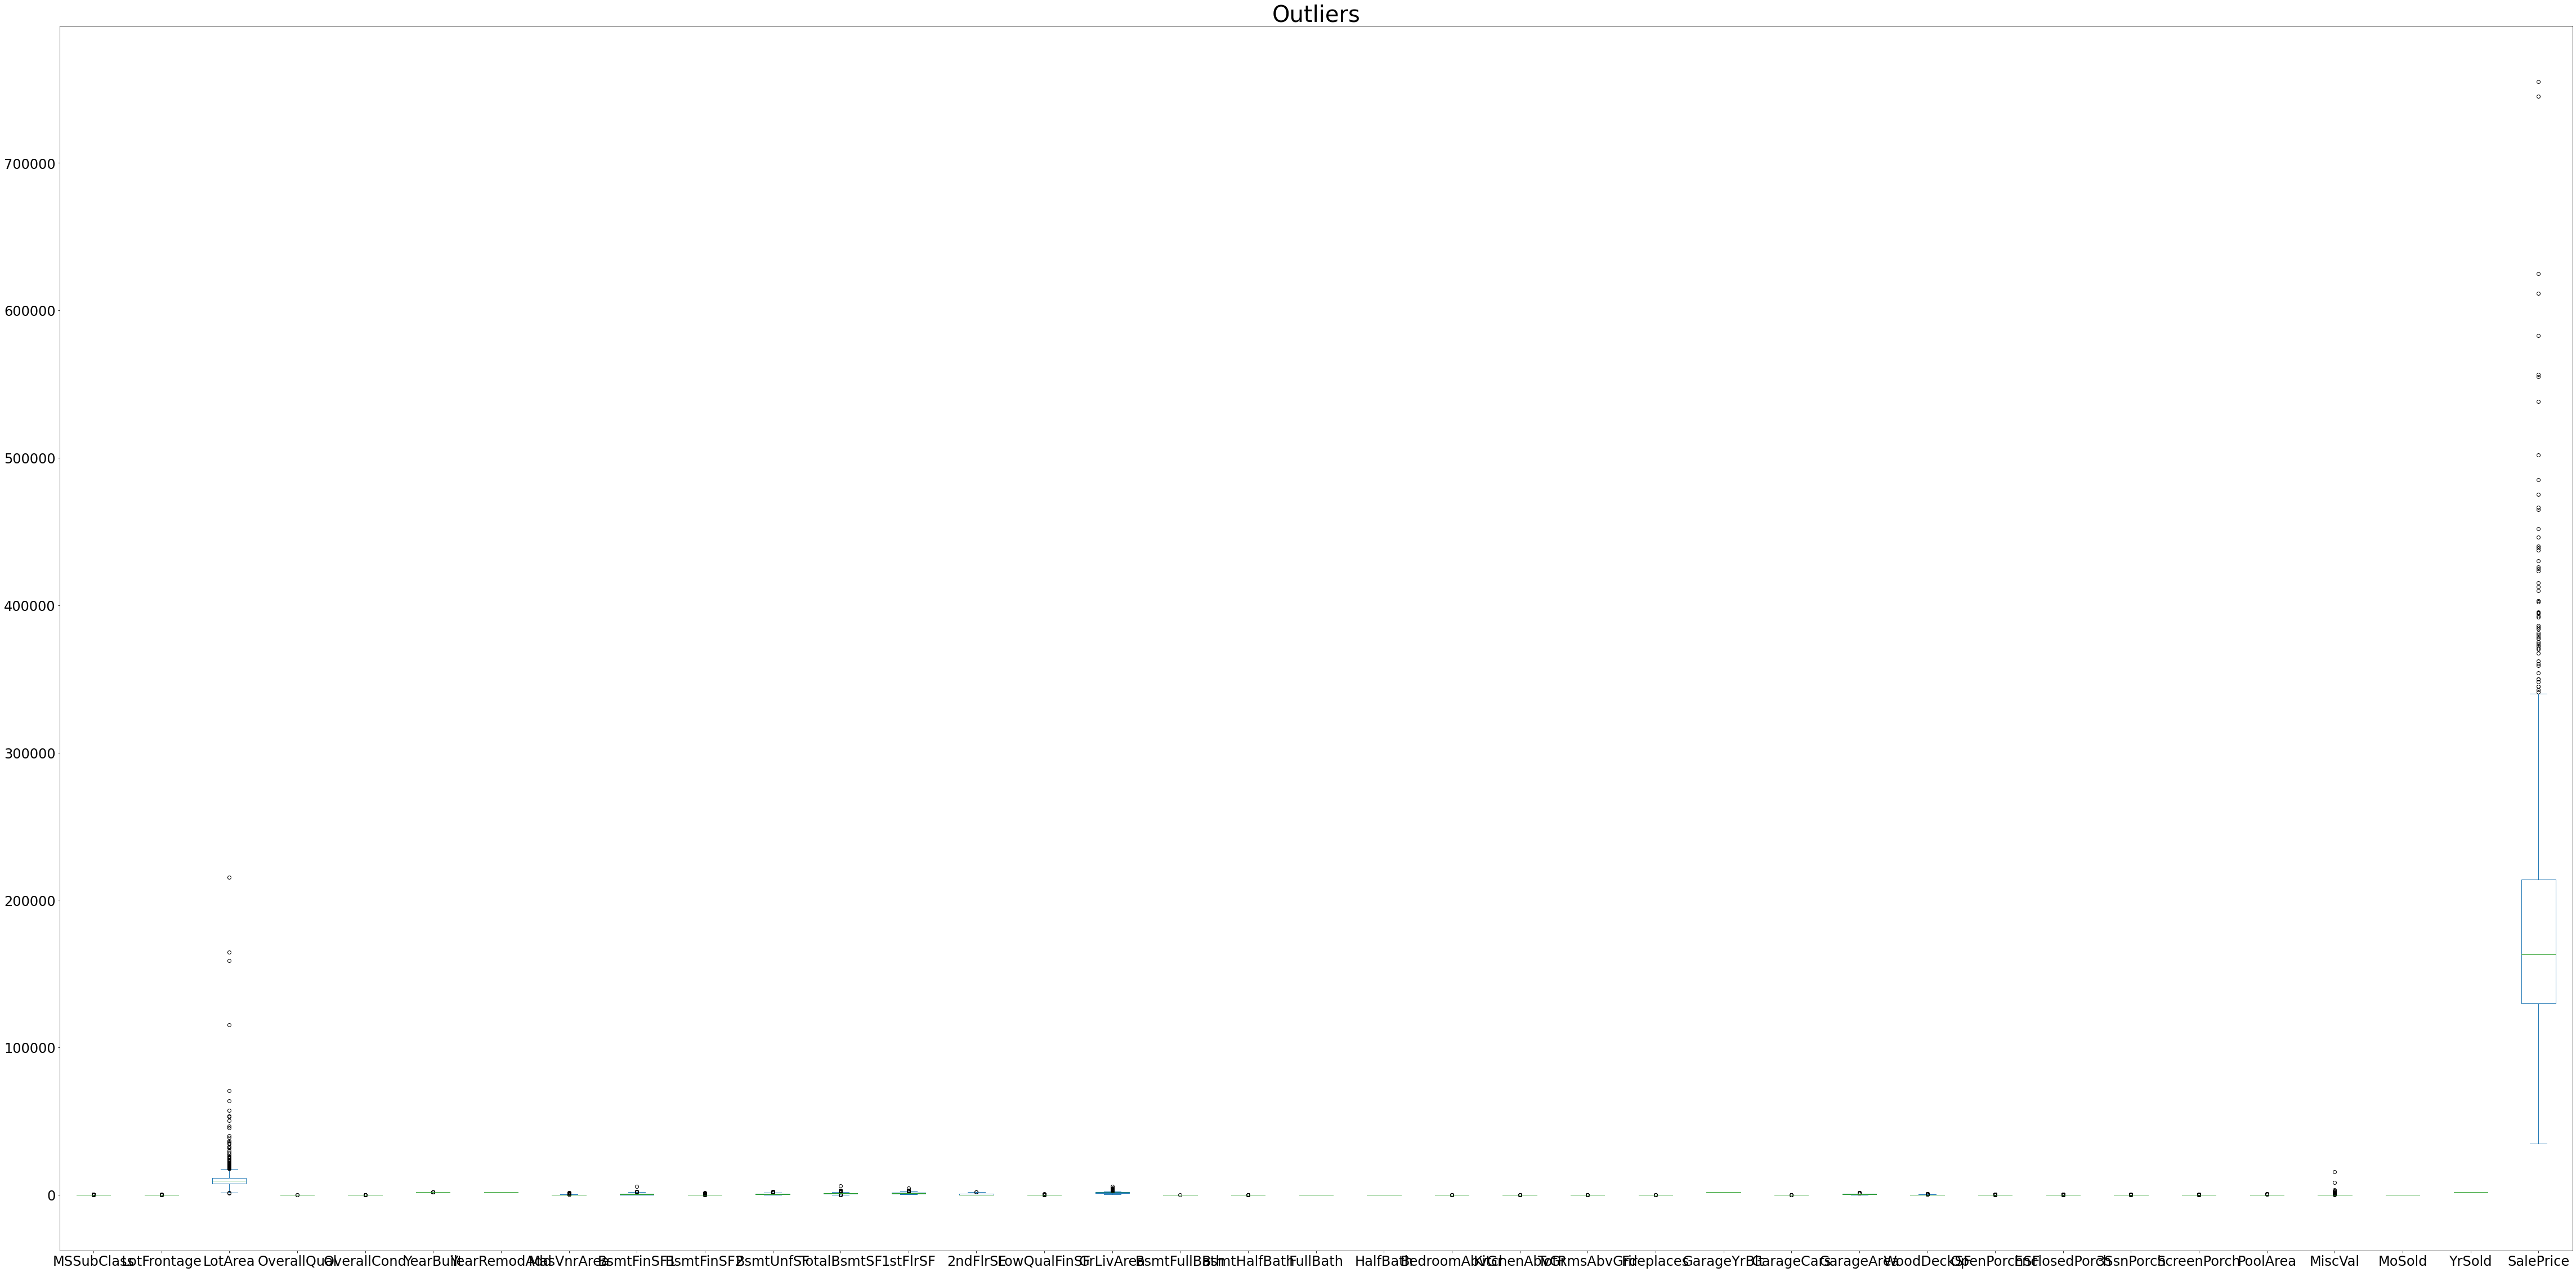

In [17]:
# visualise outliers with boxplot


fig = df.plot.box(title='Outliers', figsize=(80, 40), legend=True, fontsize=24)
fig.axes.title.set_size(40)

The plot shows that the column with the most variation and outliers is the dependant variable, SalePrice and LotArea has also some outliers

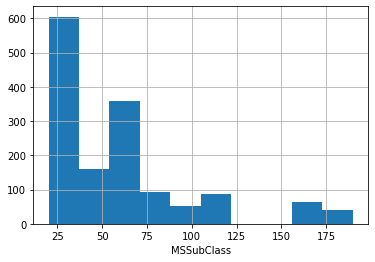

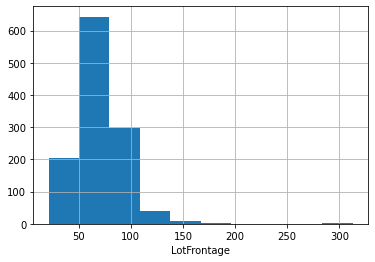

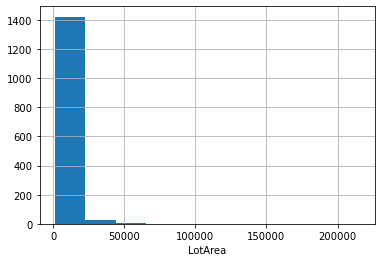

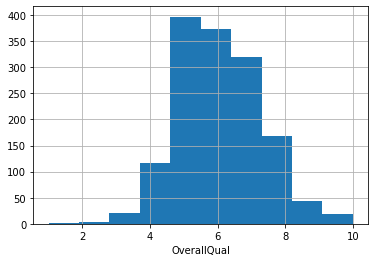

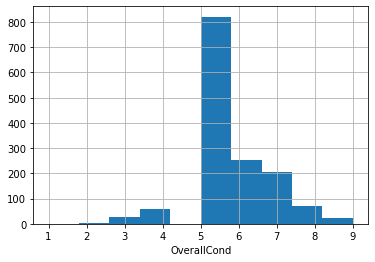

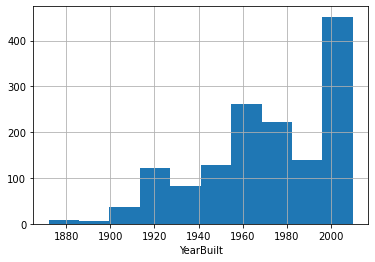

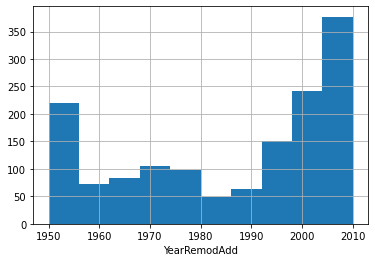

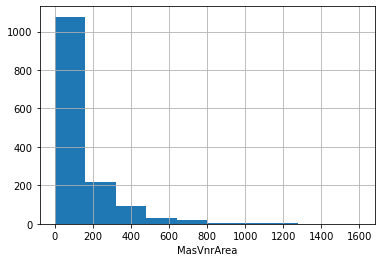

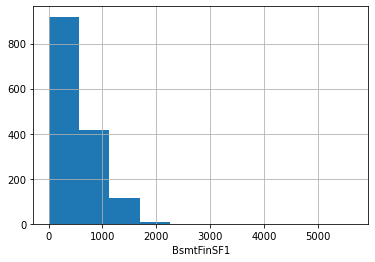

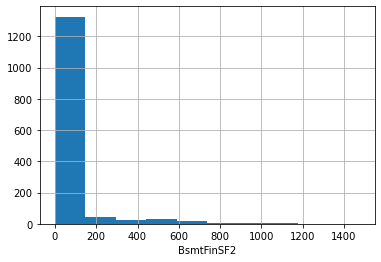

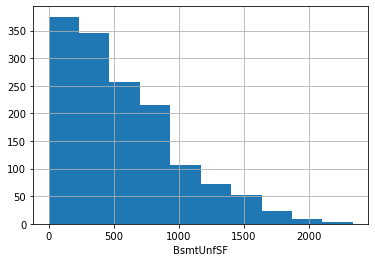

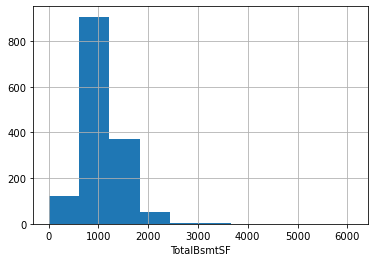

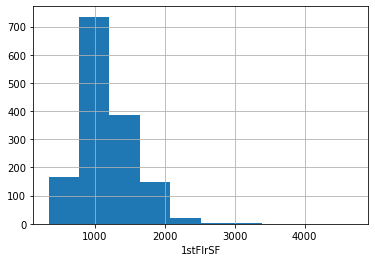

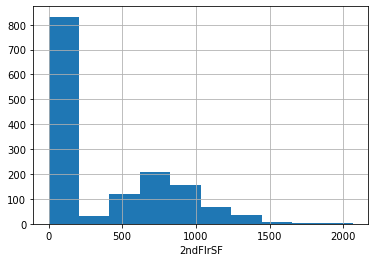

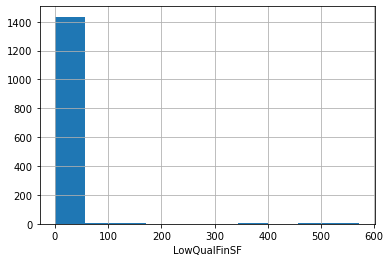

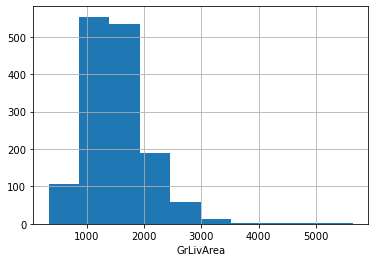

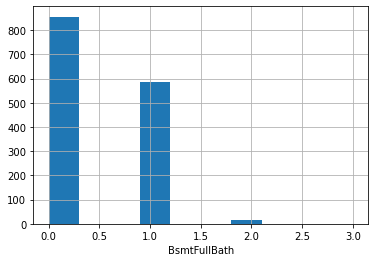

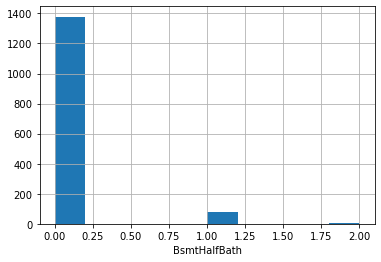

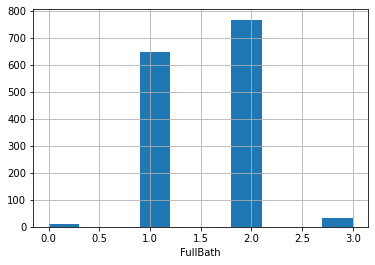

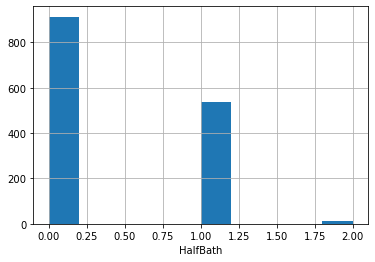

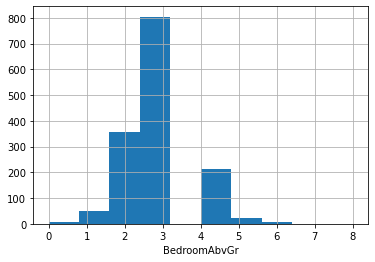

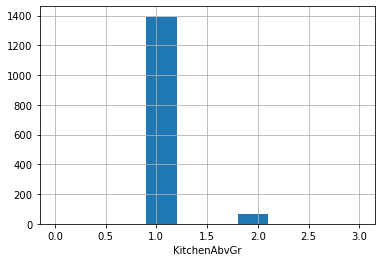

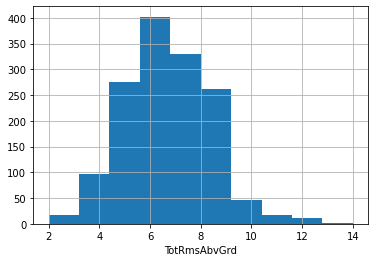

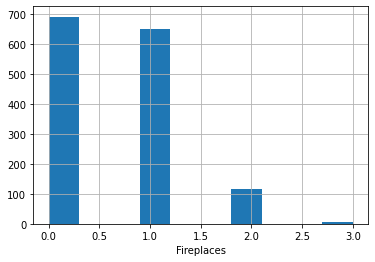

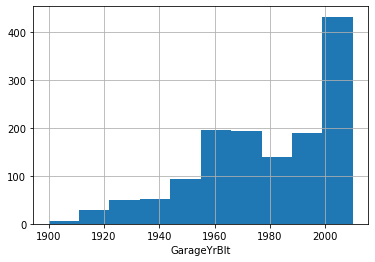

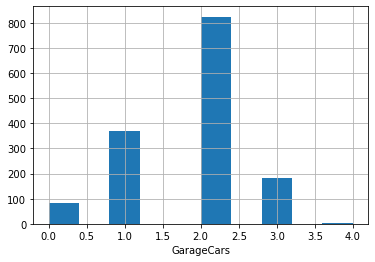

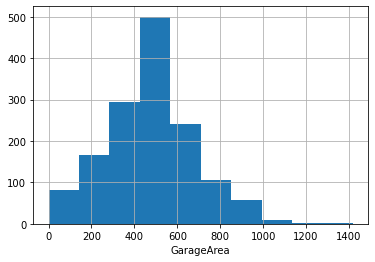

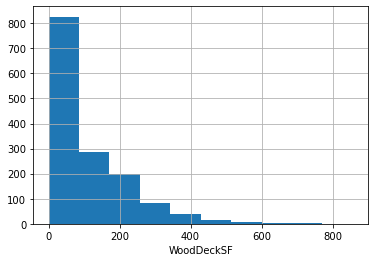

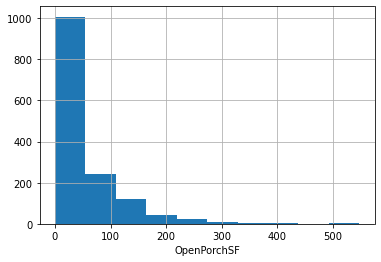

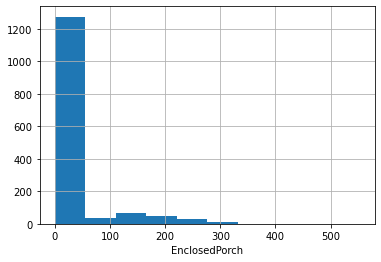

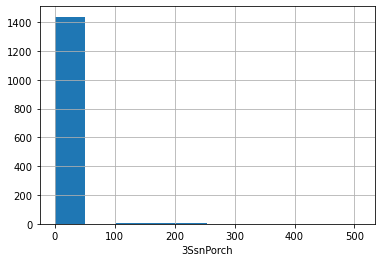

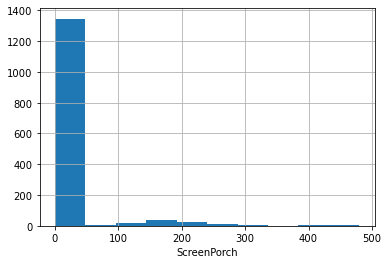

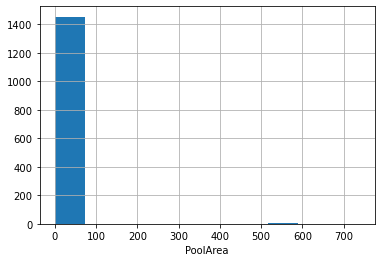

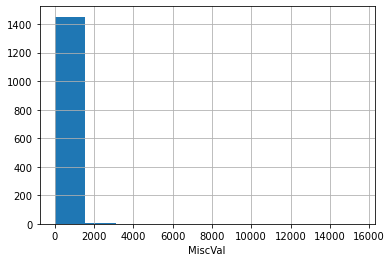

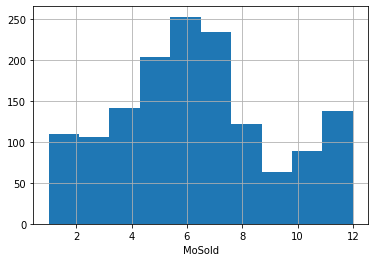

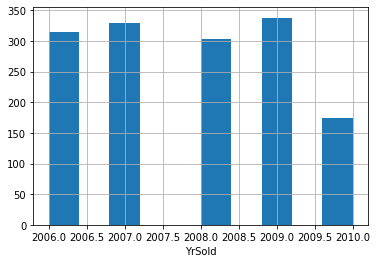

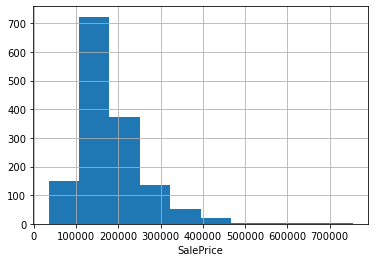

In [18]:
#checking for skewness in numerical data
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

The above histograms describe the skewness of the data. They also suggest that LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch contain very little variety in values. This observation is checked through value_counts

In [19]:
print(df['LowQualFinSF'].value_counts())
print(df['PoolArea'].value_counts())
print(df['MiscVal'].value_counts())
print(df['3SsnPorch'].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304 

Printing the value counts confirmed that there is very little variation in value, so that there is not much information that would be added to the regression model with these columns.

From a business logic standpoint, PoolArea is a similar variable to the previously dropped one.

This is also the case for MiscVal - in additon, it has a rather high number of outliers. 3SsnPorchappears to be contained in the other porch values. They are dropped as a result.

In [20]:
df = df.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [21]:
df.shape

(1460, 71)

If the variable is skewed, the mean is biased by the values at the far end of the distribution. The median is a better representation of the majority of the values in the variable.

The histograms above are used to determine which features will use the median to impute the missing values.

In [23]:
# Re-checking the amount of missing values in the columns
columns_nan =  df.columns[df.isnull().any()]

for c in columns_nan:
    print(c, df[c].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [24]:
# Imputing the media
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [25]:
# Categorical values: imputing the mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 
            'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
# Checking for the presence of any more null values
df.isnull().values.any()

False

In [27]:
df.shape

(1460, 71)

There are no more missing values in the dataset. The remaining data set contains 1460 rows and 71 columns of data.

In [28]:
# Overview of the data
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,0,0,12,2008,WD,Normal,250000


## 3.3 Outlier detection

The histograms indicated that not all data is normally distributed. However, even for the data that appears to be normally distributed, there may be outliers which was visualised above. This is addressed here.

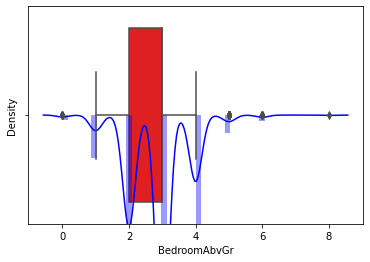

In [30]:
plt.figure()
sns.distplot(df['BedroomAbvGr'],color='b')
sns.boxplot(df['BedroomAbvGr'],color='r')
plt.show()

Here, we discovered that it is possible to plot a distribution plot on top of a boxplot.

we thought that this is actually a rather neat visualisation to show that similarities and differences between the two charts. Here, I am interested in visualising the outliers. 

It can be observed that both visualisations are successful in showing outliers.
we chose the distribution for the remainder of the features.

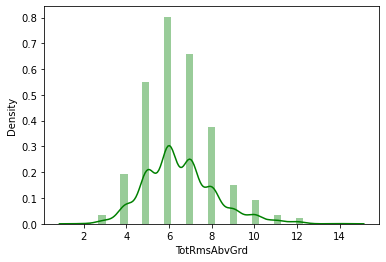

In [32]:
plt.figure()
sns.distplot(df['TotRmsAbvGrd'],color='g')
plt.show()

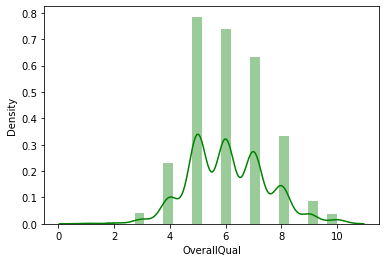

In [33]:
plt.figure()
sns.distplot(df['OverallQual'],color='g')
plt.show()

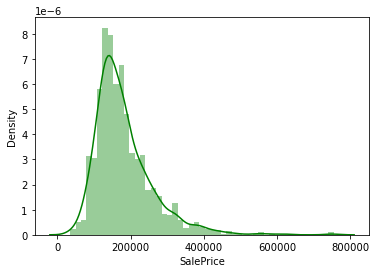

In [34]:
# Visualising the dependent variable
plt.figure()
sns.distplot(df['SalePrice'],color='g')
plt.show()

After checking the normally distributed data, outliers were removed from the columns, based on the interquartile range.

In [35]:
# Using IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 
        'SalePrice'] 

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In a next step, we are comparing how the outlier treatment has helped with the shape of the data.

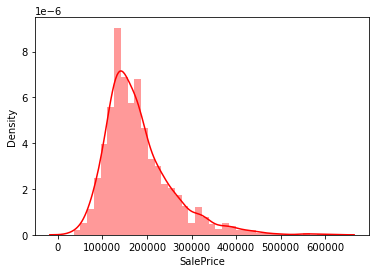

In [36]:
plt.figure()
sns.distplot(df['SalePrice'],color='r')
plt.show()

We have removed some outliers. However, the target variable is skewed to the right.

As a result, it is transformed using log and the result is visualised

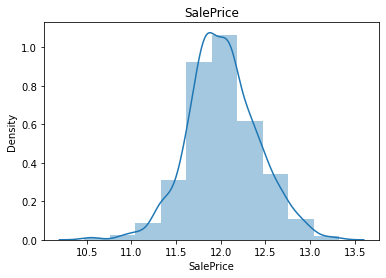

In [37]:
# Visualising the target variable -> SalePrice after transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

The dependent variable has been normalised with some residual noise.

# 4.Performing EDA (Exploratory Data Analysis)

In [38]:
# All numeric (float and int) variables in the dataset
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2003.0,2,548,0,61,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1976.0,2,460,298,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2001.0,2,608,0,42,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1998.0,3,642,0,35,272,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2000.0,3,836,192,84,0,0,12,2008,12.429220


In [39]:
df_num.shape

(1356, 33)

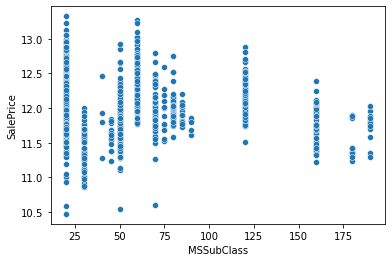

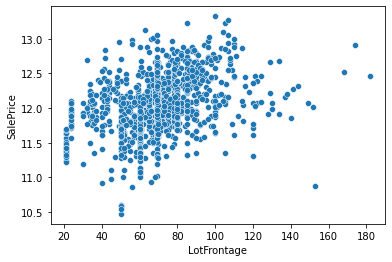

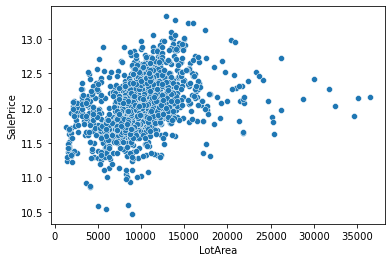

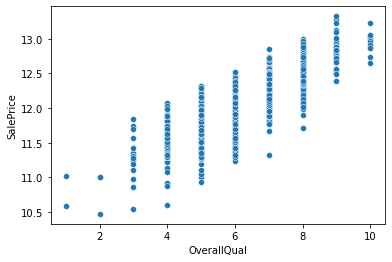

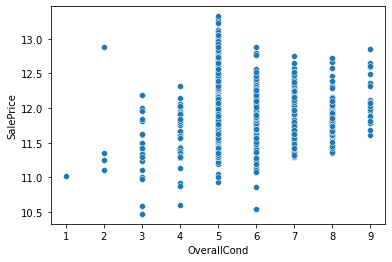

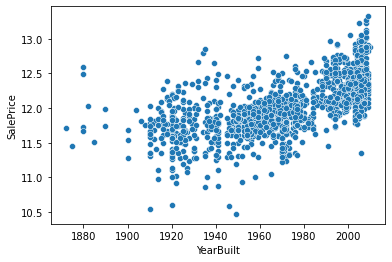

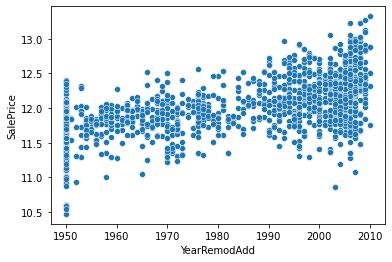

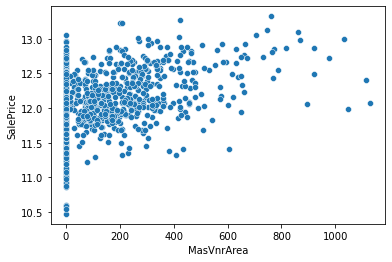

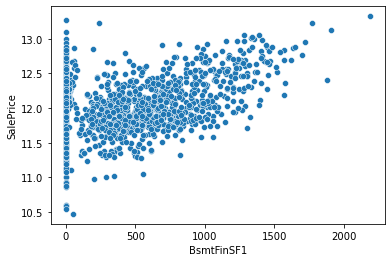

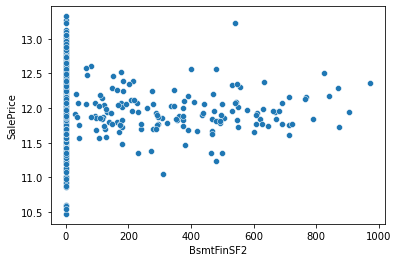

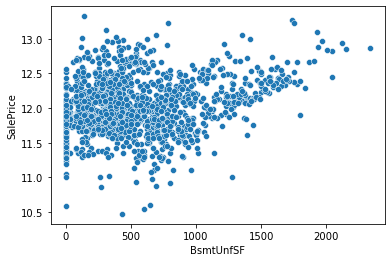

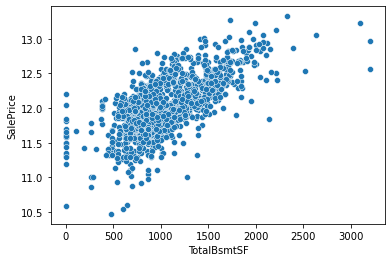

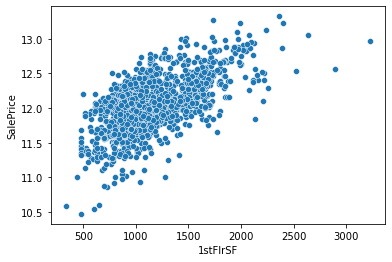

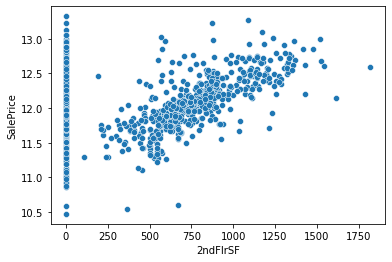

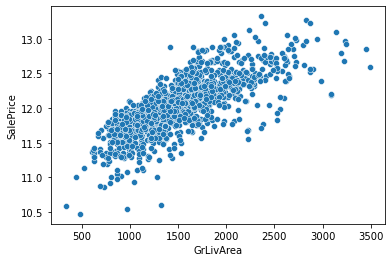

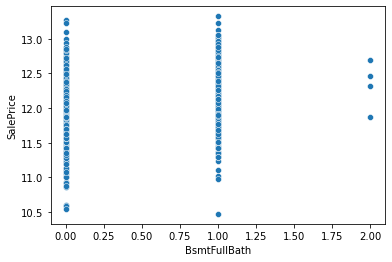

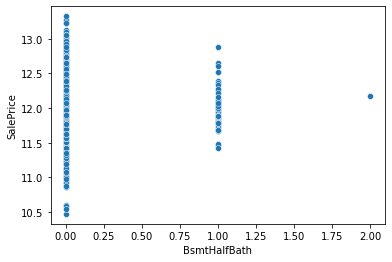

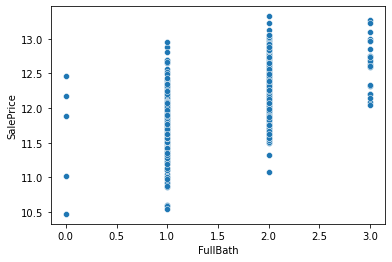

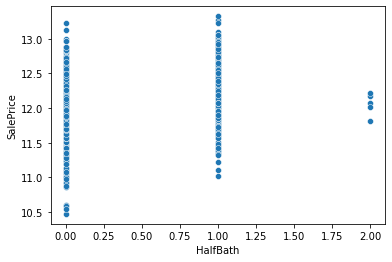

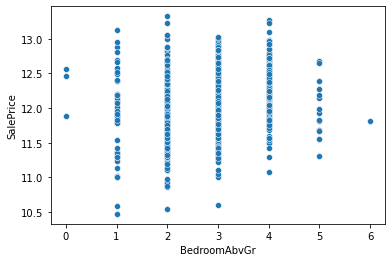

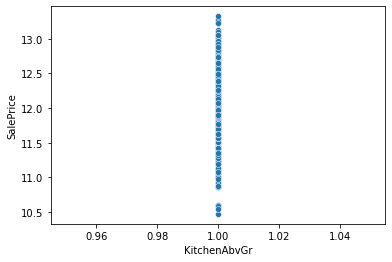

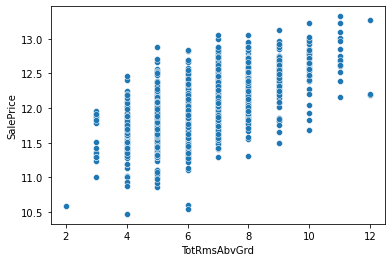

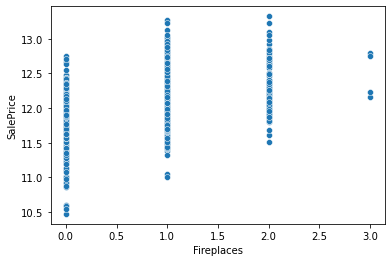

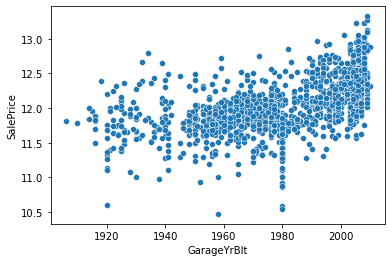

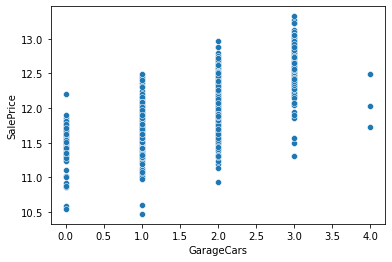

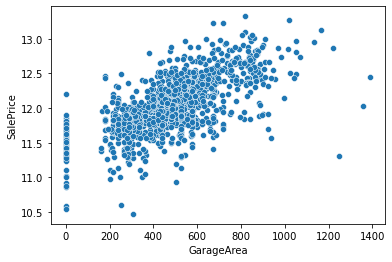

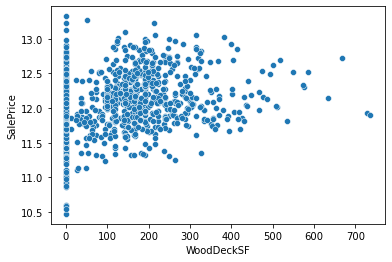

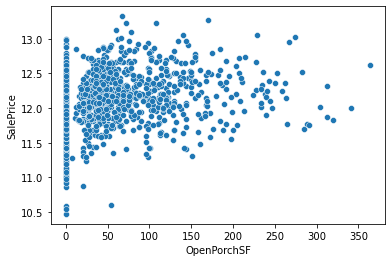

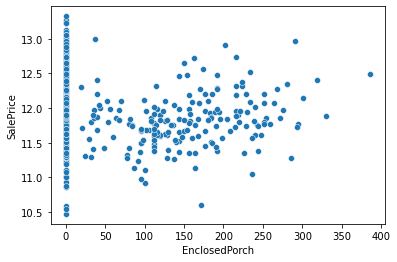

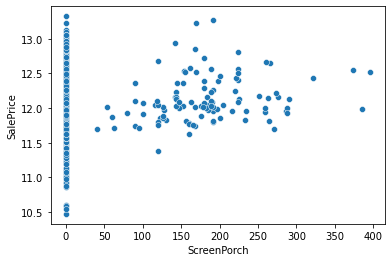

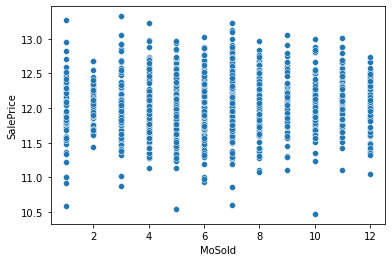

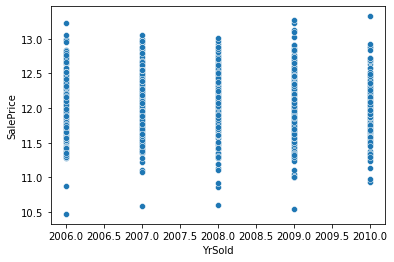

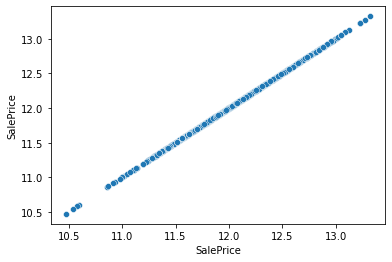

In [40]:
# Creating scatterplots for the numeric columns

for col in df_num[:-1]:  # Excluding the 'SalePrice' column
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.show()

From the above plots, we can see that multiple variables show a linear trend with the 'SalePrice' variable. Thus creating a model using regression is possible.

## 4.2 Identifying correlations

In [41]:
# correlation matrix
cor = df_num.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425547,-0.372512,0.093568,-0.068312,0.118881,0.087547,0.048586,-0.057058,-0.061048,...,0.124770,-0.003834,-0.074741,0.011925,0.024753,-0.041677,-0.023761,-0.017924,-0.030006,-0.033606
LotFrontage,-0.425547,1.000000,0.526729,0.220060,-0.063988,0.133988,0.079399,0.165461,0.135812,0.037861,...,0.080191,0.290353,0.317449,0.091117,0.123925,-0.000104,0.053106,0.012437,0.015370,0.364280
LotArea,-0.372512,0.526729,1.000000,0.158632,-0.028698,0.054476,0.019139,0.136209,0.186061,0.056191,...,0.002089,0.283762,0.321187,0.176458,0.147972,-0.013890,0.093827,-0.010367,-0.018141,0.373936
OverallQual,0.093568,0.220060,0.158632,1.000000,-0.134884,0.594482,0.548493,0.415394,0.203358,-0.109144,...,0.528339,0.625290,0.564754,0.225894,0.318338,-0.126046,0.040562,0.086078,-0.007288,0.823638
OverallCond,-0.068312,-0.063988,-0.028698,-0.134884,1.000000,-0.396008,0.042184,-0.136614,-0.037206,0.049467,...,-0.337851,-0.205957,-0.173479,-0.024767,-0.068616,0.081037,0.041587,0.001168,0.042487,-0.075506
YearBuilt,0.118881,0.133988,0.054476,0.594482,-0.396008,1.000000,0.611149,0.315152,0.240937,-0.078532,...,0.796183,0.572425,0.509830,0.226381,0.254271,-0.388191,-0.042973,0.018259,-0.010942,0.616510
YearRemodAdd,0.087547,0.079399,0.019139,0.548493,0.042184,0.611149,1.000000,0.179898,0.107205,-0.100204,...,0.624350,0.451437,0.390552,0.191182,0.253294,-0.209257,-0.047794,0.026091,0.046591,0.568793
MasVnrArea,0.048586,0.165461,0.136209,0.415394,-0.136614,0.315152,0.179898,1.000000,0.230565,-0.066045,...,0.251663,0.375918,0.378886,0.157370,0.131969,-0.102546,0.058424,-0.005703,0.009243,0.440150
BsmtFinSF1,-0.057058,0.135812,0.186061,0.203358,-0.037206,0.240937,0.107205,0.230565,1.000000,-0.056094,...,0.143553,0.226395,0.275884,0.173257,0.086807,-0.107368,0.074164,-0.004906,0.039701,0.371612
BsmtFinSF2,-0.061048,0.037861,0.056191,-0.109144,0.049467,-0.078532,-0.100204,-0.066045,-0.056094,1.000000,...,-0.105180,-0.064699,-0.037398,0.050483,-0.023879,0.054918,0.051395,-0.003287,0.047712,-0.055153


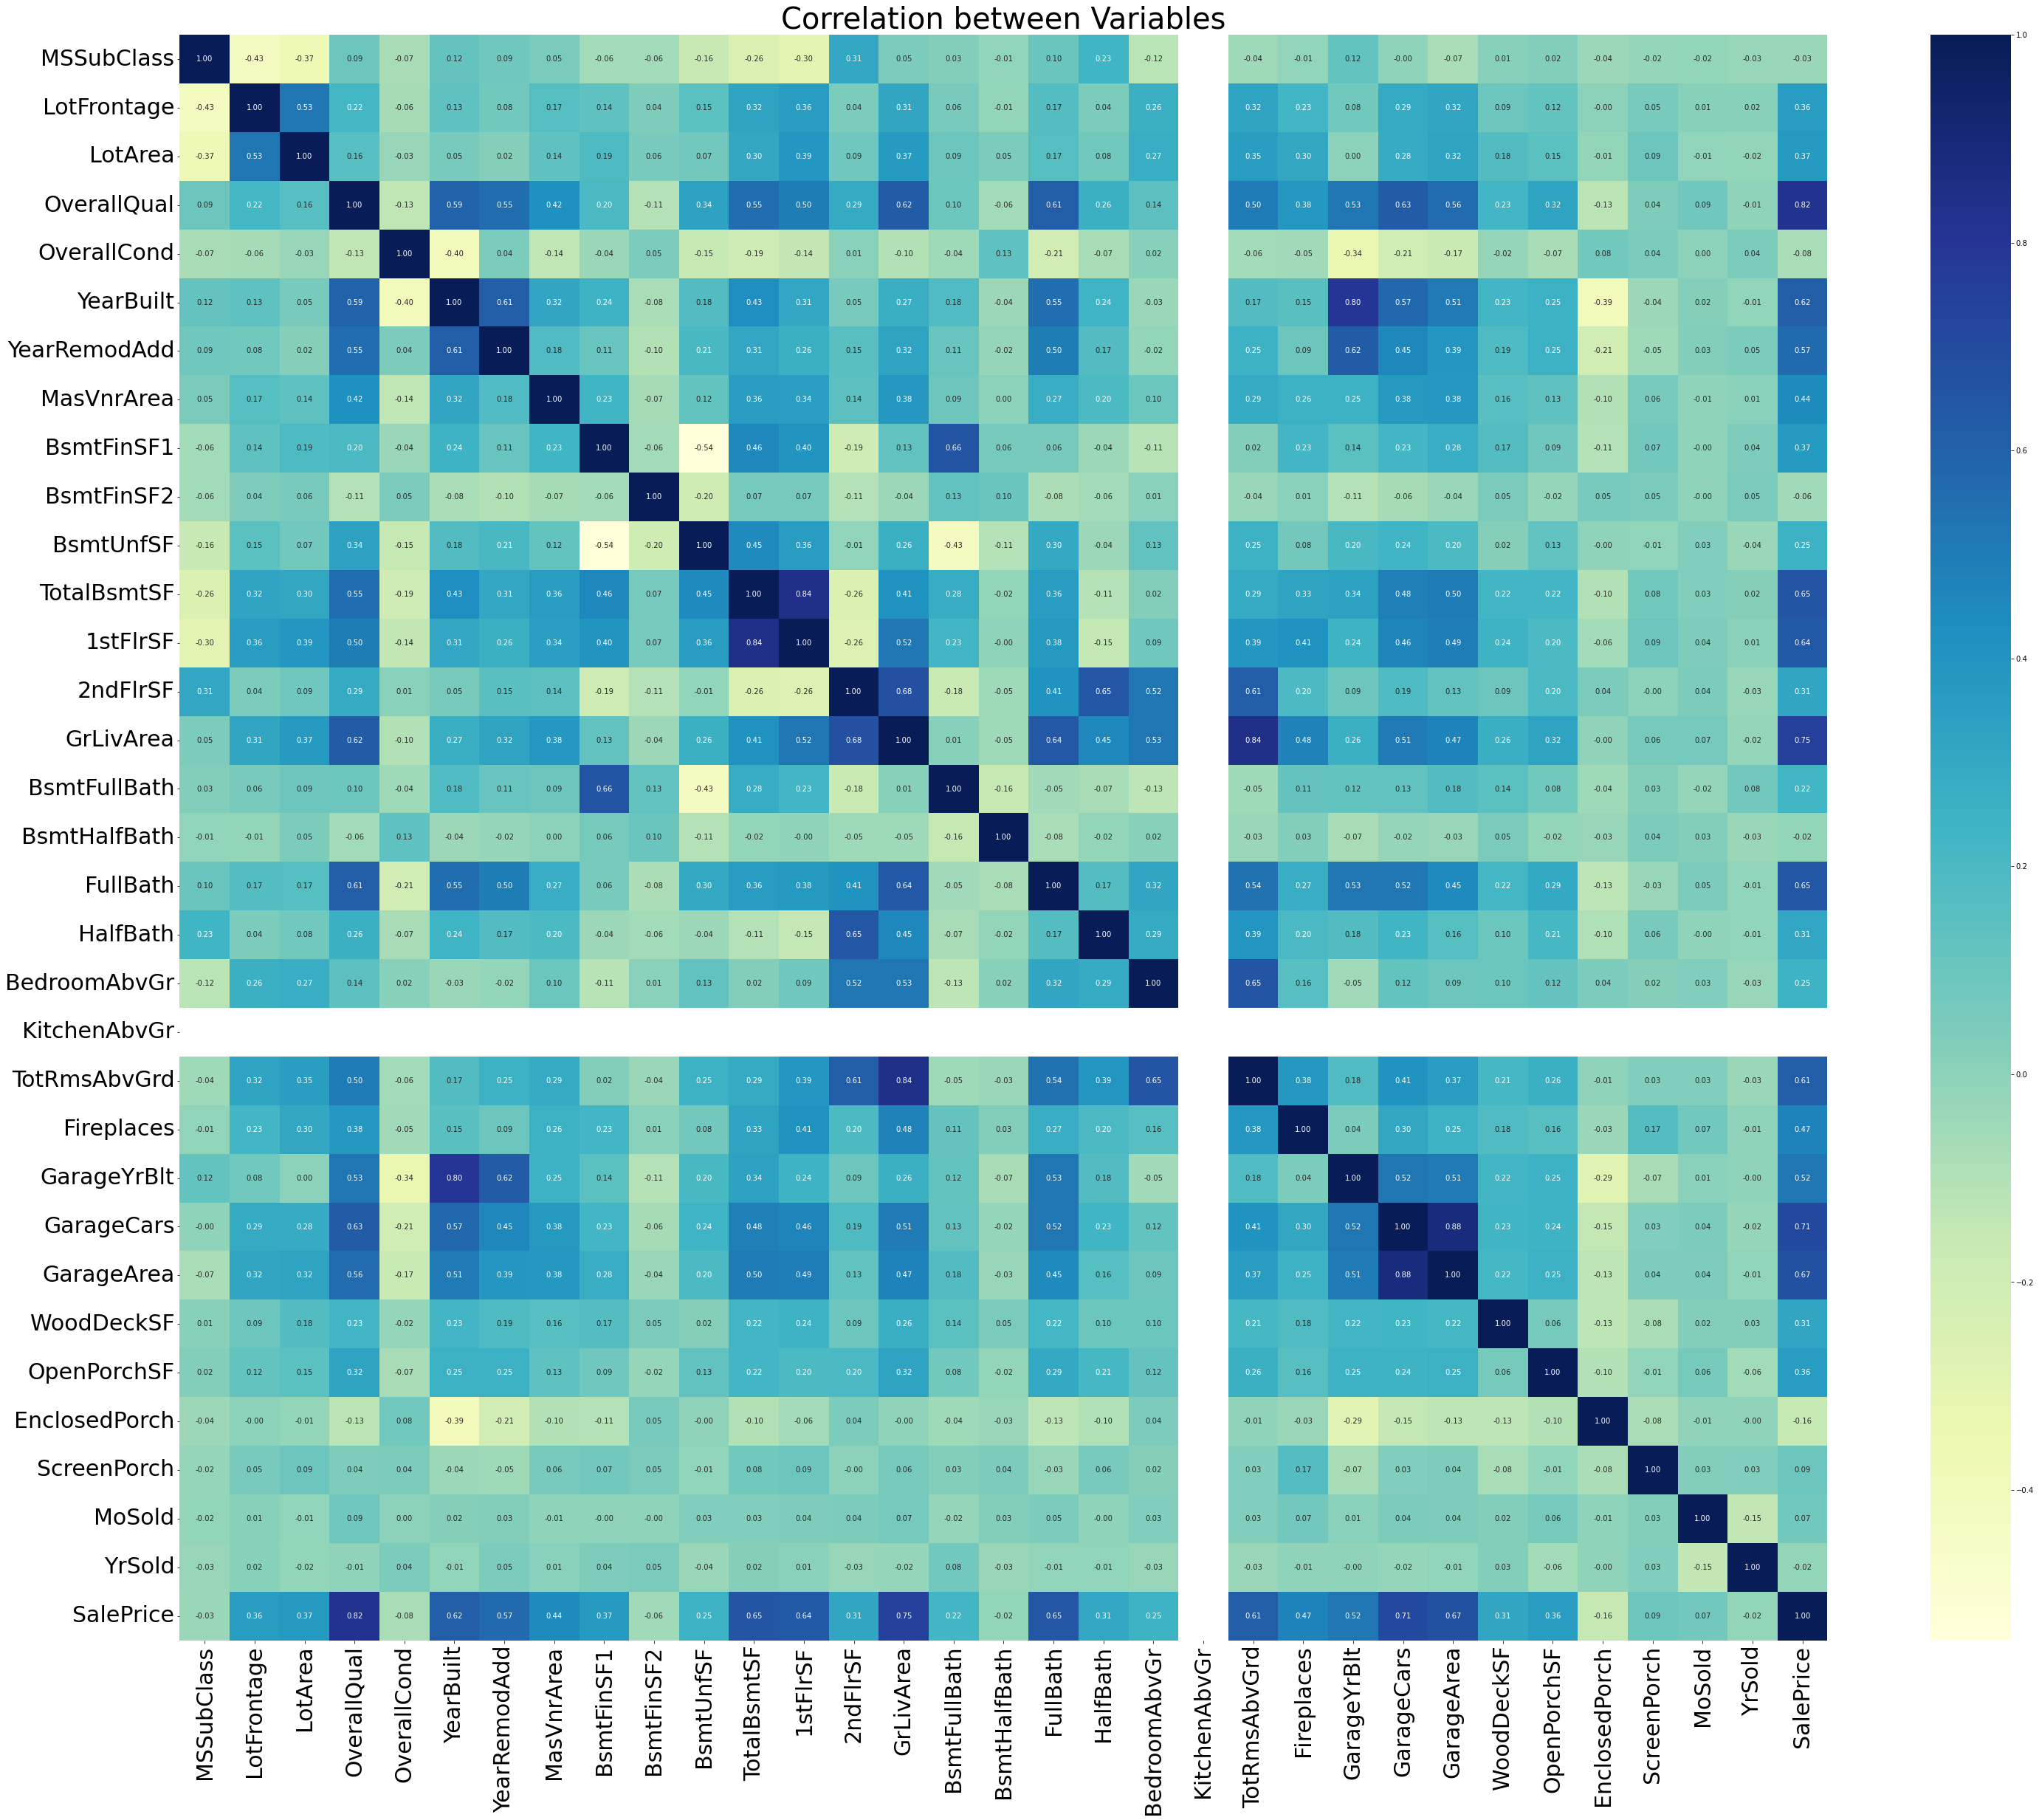

In [42]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

As we can see from the above heatmap,that there is correlation in the data

## 4.2 Dropping unnecessary columns

Insights from the heatmap: Correlation of sale price with independent variables:

Sale price is highly positively correlated with OverallQual,and GrLivArea

Sale price is positively correlated with TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

Sale price is not highly negatively correlated with other variables.

Some independent variables are highly correlated with each other. This has to be considered because of multicollinearity that may become an issue in the model

Yearbuilt and GarageYrBlt are highly correlated

TotRmsAbvGrd and GrLivArea are highly correlated

GarageArea and GarageCars are highly correlated

1stFlrSF and TotalBsmtSF are highly correlated

One of the highly correlated variables above is dropped

In [43]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

In a next step, we visualised the 20 most highly correlated variables to Sale Price.

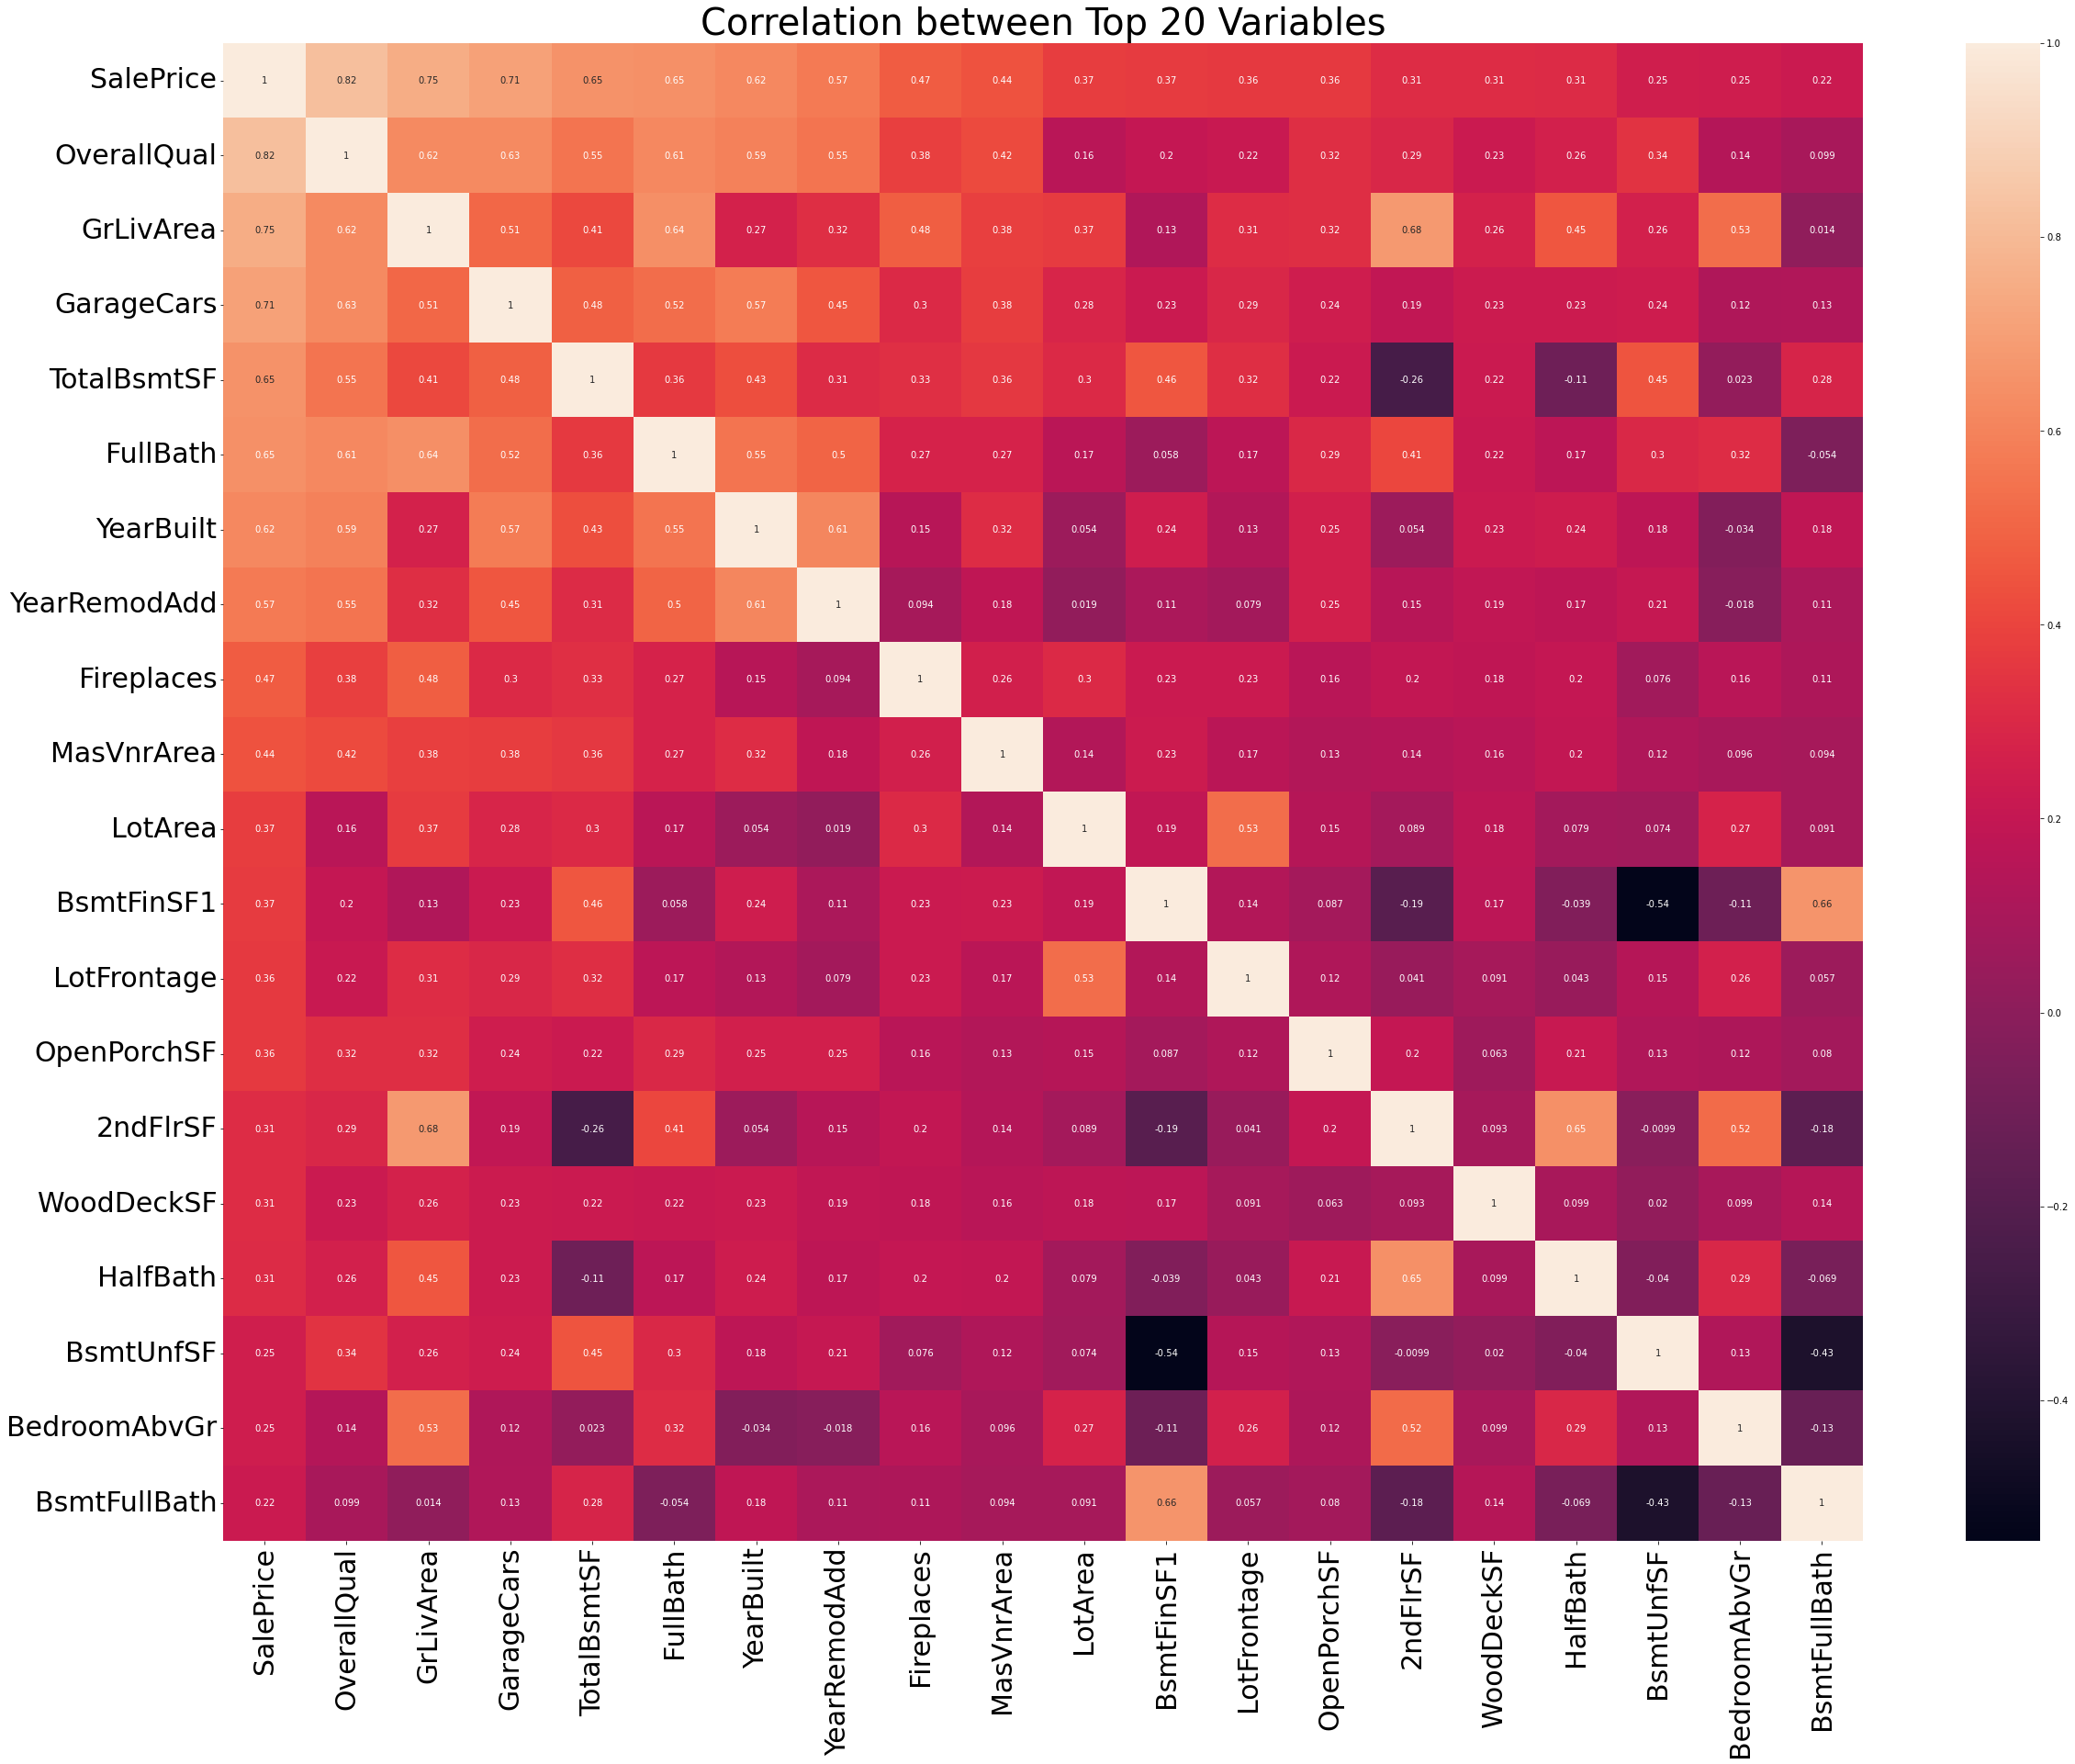

In [45]:
# sales price correlation matrix
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

# 5. Data preparation

Here, the data is prepared for building a regression model.

## 4.1 Creating dummy variables

The dataset contains a couple of categorical values. This means that the variable is changed so that it is represented by only the value 0 or 1 to show the absence or presence which may shift the outcome of the prediction in a linear regression analysis.

Creating dummy variables is useful, because the variable is more flexible and allows multiple comparisons to be made.

First, categorical variables are mapped to a string, then converted to a dummy variable, using n-1 to ensure that there is multicollinearity between dummy variables.

In [47]:
# Checking which columns containg categorical data
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [48]:
# Convert categorical value into Dummy variables (one hot encoding)
df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## 4.2 Scaling Data

In [51]:
# drop categorical variables from the dataset and save as predictor variable X
X = df.drop(list(df_categorical.columns), axis=1)

In [52]:
#removing response variable from the set
X = X.drop(['SalePrice'], axis=1)

In [53]:
y = df['SalePrice'] # response variable in Y

In [54]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [55]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


## 4.3 Spliting the dataset

In [59]:
# Running the standard scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()


The data set is divided into two subsets: the training set (70%) to train the model and a test set (30%) to test the trained model. 
The aim is to create a training set that is representative of the data set as a whole. To do this, the rows are selected randomly from the data

In [60]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# 5. Model Building

Building a Simple Linear Regression mode

In [61]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predicting on the train set
y_train_pred = lr.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred)

0.9529183248268959

In [64]:
# Predicting on the test set
y_test_pred = lr.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred)

0.9058536444504741

In [65]:
# Checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

14.856984262552931


[(-0.00040499028050744923, 'MSSubClass'),
 (0.0007392462832813603, 'LotFrontage'),
 (8.346528959713871e-06, 'LotArea'),
 (0.042962744941209115, 'OverallQual'),
 (0.03768802333075514, 'OverallCond'),
 (0.0019974296201034037, 'YearBuilt'),
 (0.00043354730416019773, 'YearRemodAdd'),
 (-7.698720445369154e-07, 'MasVnrArea'),
 (5.41863175891039e-05, 'BsmtFinSF1'),
 (5.259452120259106e-05, 'BsmtFinSF2'),
 (-7.197326799109061e-06, 'BsmtUnfSF'),
 (9.958352449649863e-05, 'TotalBsmtSF'),
 (1.23951099351427e-05, '2ndFlrSF'),
 (0.0002596930936566398, 'GrLivArea'),
 (0.022491087310520602, 'BsmtFullBath'),
 (0.012714966062406404, 'BsmtHalfBath'),
 (0.030596667945869835, 'FullBath'),
 (0.02588460562929043, 'HalfBath'),
 (-0.0015815213336785898, 'BedroomAbvGr'),
 (1.083265421808477e-13, 'KitchenAbvGr'),
 (0.010819616985916903, 'Fireplaces'),
 (0.04362007222668862, 'GarageCars'),
 (7.18321653124035e-05, 'WoodDeckSF'),
 (8.987857363467952e-05, 'OpenPorchSF'),
 (0.00017335600322820844, 'EnclosedPorch'),
 

## 5.1 Building the model


### 1. Using Ridge Regression

In [128]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009933,0.002022,0.004036,0.001165,0.0001,{'alpha': 0.0001},-0.088908,-0.090868,-0.087960,-0.083949,...,-0.088145,0.002299,26,-0.055397,-0.058017,-0.058581,-0.057892,-0.057553,-0.057488,0.001097
1,0.008512,0.001814,0.002593,0.000798,0.001,{'alpha': 0.001},-0.088885,-0.090861,-0.087905,-0.083938,...,-0.088110,0.002295,25,-0.055405,-0.058018,-0.058582,-0.057894,-0.057563,-0.057492,0.001094
2,0.007830,0.001175,0.003789,0.000977,0.01,{'alpha': 0.01},-0.088674,-0.090792,-0.087376,-0.083827,...,-0.087772,0.002273,24,-0.055467,-0.058020,-0.058598,-0.057918,-0.057652,-0.057531,0.001077
3,0.007581,0.001621,0.003392,0.001018,0.05,{'alpha': 0.05},-0.088066,-0.090436,-0.085419,-0.083396,...,-0.086633,0.002411,23,-0.055670,-0.058056,-0.058685,-0.058041,-0.057975,-0.057686,0.001040
4,0.008512,0.001437,0.010839,0.014555,0.1,{'alpha': 0.1},-0.087668,-0.090005,-0.083801,-0.082933,...,-0.085669,0.002711,22,-0.055855,-0.058196,-0.058826,-0.058197,-0.058378,-0.057890,0.001043
5,0.008978,0.002276,0.004387,0.001353,0.2,{'alpha': 0.2},-0.087218,-0.089184,-0.081916,-0.082130,...,-0.084425,0.003149,21,-0.056176,-0.058499,-0.059215,-0.058435,-0.058959,-0.058257,0.001080
6,0.007389,0.001362,0.003398,0.001346,0.3,{'alpha': 0.3},-0.086821,-0.088454,-0.080691,-0.081449,...,-0.083591,0.003358,20,-0.056455,-0.058773,-0.059540,-0.058649,-0.059362,-0.058556,0.001103
7,0.008002,0.001671,0.003293,0.000408,0.4,{'alpha': 0.4},-0.086459,-0.087847,-0.079827,-0.080911,...,-0.082966,0.003470,19,-0.056682,-0.059014,-0.059812,-0.058841,-0.059683,-0.058806,0.001126
8,0.009212,0.001052,0.003590,0.000488,0.5,{'alpha': 0.5},-0.086146,-0.087315,-0.079207,-0.080447,...,-0.082462,0.003534,18,-0.056880,-0.059244,-0.060045,-0.059007,-0.059963,-0.059028,0.001146
9,0.009384,0.001356,0.004194,0.000744,0.6,{'alpha': 0.6},-0.085853,-0.086896,-0.078706,-0.080063,...,-0.082050,0.003580,17,-0.057058,-0.059447,-0.060244,-0.059155,-0.060225,-0.059226,0.001165


In [130]:
model_cv.best_params_

{'alpha': 10.0}

In [131]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

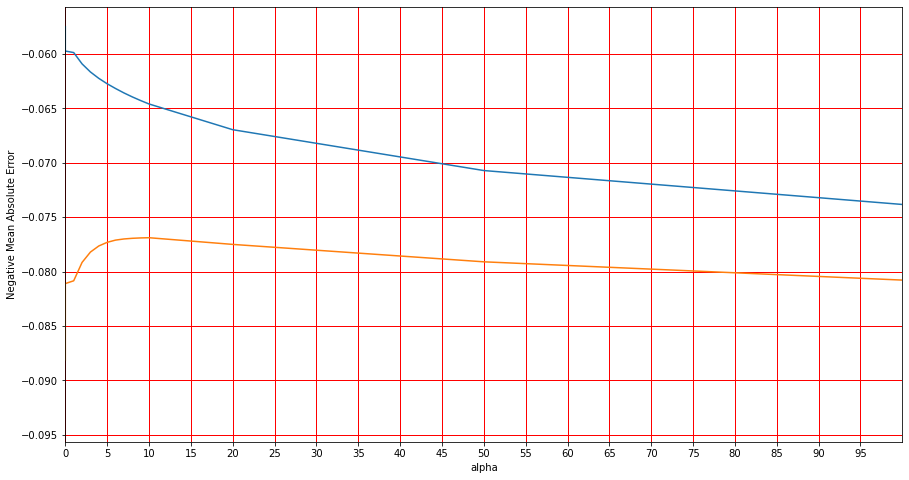

In [132]:
# Plotting the mean test and train scores

plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [156]:
# Setting alpha as 10, building a ridge regression model
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [157]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9417942155185163

In [158]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.920382076055638

In [159]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

13.791291254081752


[(13.791, 'constant'),
 (0.084, 'Neighborhood_Crawfor'),
 (0.081, 'Functional_Typ'),
 (0.064, 'Neighborhood_StoneBr'),
 (-0.057, 'Neighborhood_MeadowV'),
 (0.057, 'SaleCondition_Normal'),
 (0.054, 'OverallQual'),
 (-0.054, 'Functional_Maj2'),
 (0.053, 'Condition1_Norm'),
 (0.051, 'Street_Pave'),
 (0.051, 'SaleType_New'),
 (0.049, 'MSZoning_FV'),
 (-0.048, 'Neighborhood_Edwards'),
 (0.047, 'MSZoning_RL'),
 (0.047, 'Neighborhood_NridgHt'),
 (0.047, 'Functional_Min2'),
 (-0.047, 'Functional_Mod'),
 (-0.046, 'GarageCond_Fa'),
 (0.044, 'Exterior1st_BrkFace'),
 (0.043, 'OverallCond'),
 (-0.04, 'Neighborhood_Mitchel'),
 (0.04, 'PavedDrive_Y'),
 (0.039, 'GarageCars'),
 (-0.037, 'HouseStyle_2.5Fin'),
 (0.036, 'SaleCondition_Partial'),
 (0.035, 'LotConfig_CulDSac'),
 (-0.033, 'KitchenQual_Fa'),
 (-0.032, 'Condition1_RRAe'),
 (-0.032, 'Exterior1st_BrkComm'),
 (0.031, 'LandContour_HLS'),
 (0.031, 'BsmtCond_TA'),
 (0.03, 'Exterior2nd_Stucco'),
 (-0.03, 'KitchenQual_TA'),
 (-0.029, 'Exterior2nd_BrkF

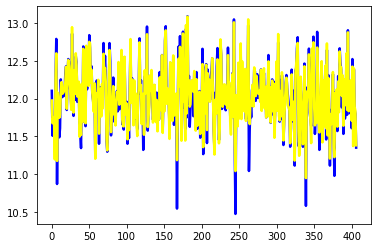

In [137]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_ridge, color='yellow', linewidth=2.5, linestyle='-')
plt.show()

### 2. Using Lasso Regression

In [138]:
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.111501,0.062734,0.004788,7.459965e-04,0.0001,{'alpha': 0.0001},-0.083886,-0.085703,-0.075422,-0.076879,...,-0.079922,0.004087,2,-0.057543,-0.059574,-0.061231,-0.059939,-0.060734,-0.059804,0.001272
1,0.021342,0.002795,0.003790,7.463276e-04,0.001,{'alpha': 0.001},-0.080123,-0.087548,-0.075266,-0.072732,...,-0.078106,0.005305,1,-0.068769,-0.068958,-0.071367,-0.070183,-0.070523,-0.069960,0.000977
2,0.011967,0.001893,0.004189,9.773500e-04,0.01,{'alpha': 0.01},-0.088140,-0.102923,-0.091239,-0.087343,...,-0.089825,0.007611,3,-0.086477,-0.083771,-0.086388,-0.087728,-0.089658,-0.086804,0.001922
3,0.013563,0.001017,0.004588,4.884414e-04,0.05,{'alpha': 0.05},-0.098949,-0.114522,-0.109731,-0.104599,...,-0.104873,0.006647,4,-0.102114,-0.101361,-0.102197,-0.102751,-0.103699,-0.102425,0.000776
4,0.018152,0.002555,0.004189,7.457167e-04,0.1,{'alpha': 0.1},-0.104510,-0.117885,-0.113351,-0.108079,...,-0.108805,0.006263,5,-0.106930,-0.104628,-0.105714,-0.106745,-0.108455,-0.106494,0.001280
5,0.016157,0.002034,0.004588,1.017308e-03,0.2,{'alpha': 0.2},-0.106907,-0.118054,-0.113889,-0.108639,...,-0.109611,0.005994,6,-0.107909,-0.105576,-0.106666,-0.107610,-0.109062,-0.107365,0.001177
6,0.014960,0.001410,0.004986,6.306757e-04,0.3,{'alpha': 0.3},-0.108554,-0.118437,-0.114734,-0.110128,...,-0.110703,0.005705,7,-0.108940,-0.107044,-0.108019,-0.109106,-0.110446,-0.108711,0.001138
7,0.015159,0.001716,0.005586,4.891040e-04,0.4,{'alpha': 0.4},-0.110007,-0.119546,-0.115264,-0.111200,...,-0.111732,0.005647,8,-0.109949,-0.108201,-0.109273,-0.110215,-0.111825,-0.109893,0.001190
8,0.013962,0.000892,0.004588,4.884609e-04,0.5,{'alpha': 0.5},-0.111120,-0.120867,-0.116231,-0.112229,...,-0.112788,0.005773,9,-0.110951,-0.109448,-0.110619,-0.111107,-0.112949,-0.111015,0.001128
9,0.013962,0.001669,0.004987,6.307510e-04,0.6,{'alpha': 0.6},-0.112214,-0.122346,-0.117529,-0.113473,...,-0.113979,0.005983,10,-0.112135,-0.110749,-0.111964,-0.112226,-0.114114,-0.112238,0.001079


In [160]:
model_cv.best_params_

{'alpha': 0.001}

In [161]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

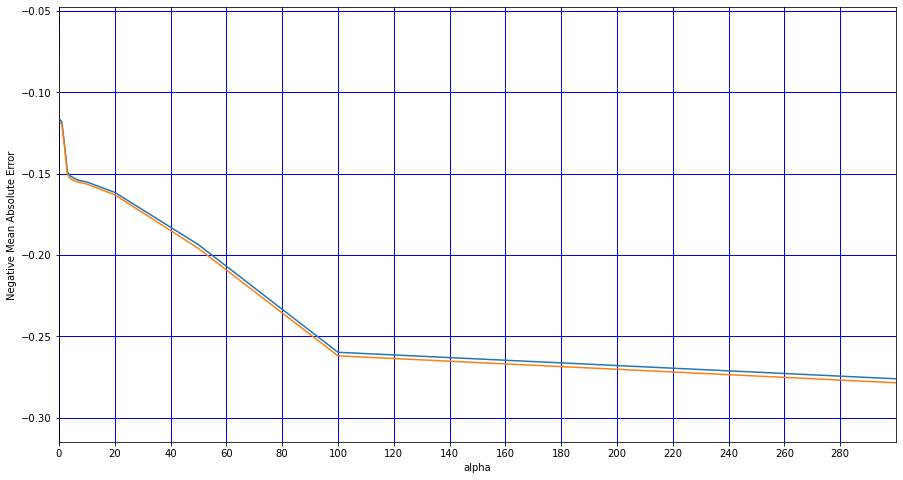

In [168]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 300)
plt.xticks(np.arange(0, 300, 20))
plt.grid(color='b', linestyle='-', linewidth=1)
plt.show()

In [177]:
# Setting alpha as 20, building a lasso regression model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [178]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.9308150158241388

In [179]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.9194788349631385

The training accuracy is lower than what was generated before. However, the gap between training and testing data is lower. Depending on the business situation, this may be a better model to use

In [180]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(12.079, 'constant'),
 (0.097, 'Neighborhood_Crawfor'),
 (0.087, 'SaleType_New'),
 (0.07, 'Functional_Typ'),
 (0.062, 'OverallQual'),
 (0.061, 'MSZoning_FV'),
 (0.048, 'MSZoning_RL'),
 (0.047, 'Neighborhood_StoneBr'),
 (0.047, 'SaleCondition_Normal'),
 (0.045, 'OverallCond'),
 (0.044, 'Condition1_Norm'),
 (0.043, 'GarageCars'),
 (0.043, 'Neighborhood_NridgHt'),
 (0.034, 'Functional_Min2'),
 (0.034, 'PavedDrive_Y'),
 (0.027, 'Neighborhood_BrkSide'),
 (0.025, 'LotConfig_CulDSac'),
 (-0.025, 'Neighborhood_Edwards'),
 (0.021, 'BsmtCond_TA'),
 (-0.02, 'BsmtQual_Gd'),
 (0.02, 'BsmtExposure_Gd'),
 (-0.018, 'BldgType_Twnhs'),
 (0.018, 'Foundation_PConc'),
 (0.017, 'Fireplaces'),
 (-0.017, 'Neighborhood_MeadowV'),
 (0.017, 'MasVnrType_Stone'),
 (-0.016, 'Exterior1st_HdBoard'),
 (-0.015, 'Neighborhood_Mitchel'),
 (-0.015, 'Exterior1st_Wd Sdng'),
 (-0.015, 'HeatingQC_TA'),
 (0.015, 'CentralAir_Y'),
 (-0.013, 'GarageFinish_Unf'),
 (-0.011, 'HouseStyle_2Story'),
 (0.011, 'Exterior1st_BrkFace'),
 (

In [181]:
lasso_selected_features

['Neighborhood_Crawfor',
 'SaleType_New',
 'Functional_Typ',
 'OverallQual',
 'MSZoning_FV',
 'MSZoning_RL',
 'Neighborhood_StoneBr',
 'SaleCondition_Normal',
 'OverallCond',
 'Condition1_Norm',
 'GarageCars',
 'Neighborhood_NridgHt',
 'Functional_Min2',
 'PavedDrive_Y',
 'Neighborhood_BrkSide',
 'LotConfig_CulDSac',
 'Neighborhood_Edwards',
 'BsmtCond_TA',
 'BsmtQual_Gd',
 'BsmtExposure_Gd',
 'BldgType_Twnhs',
 'Foundation_PConc',
 'Fireplaces',
 'Neighborhood_MeadowV',
 'MasVnrType_Stone',
 'Exterior1st_HdBoard',
 'Neighborhood_Mitchel',
 'Exterior1st_Wd Sdng',
 'HeatingQC_TA',
 'CentralAir_Y',
 'GarageFinish_Unf',
 'HouseStyle_2Story',
 'Exterior1st_BrkFace',
 'Foundation_CBlock',
 'BsmtFinType1_GLQ',
 'FullBath',
 'GarageType_Detchd',
 'BsmtFullBath',
 'Neighborhood_Somerst',
 'ExterCond_Gd',
 'BsmtFinType1_Unf',
 'BsmtExposure_No',
 'KitchenQual_TA',
 'YrSold',
 'YearBuilt',
 'LandContour_HLS',
 'HouseStyle_1Story',
 'HeatingQC_Gd',
 'Electrical_SBrkr',
 'GarageCond_Fa',
 'LotFron

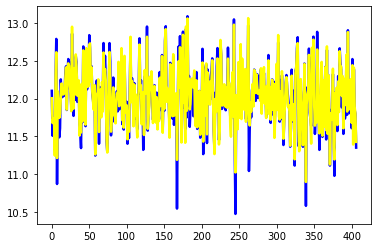

In [182]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(ind, y_test_pred_lasso, color='yellow', linewidth=2.5, linestyle='-')
plt.show()

#### Based on the r2_score of the 3 models, we can see that their r2_scores are slightly similar, as such it is better to go for the simplest model.


#### In this case it would be better to go with Lasso as it panalizes the variables, and helps in feature selection.

### The optimum value of lambda for Ridge Regression comes out to be as 10 


### while the optimum value of lambda for Lasso Regression comes out to be 0.001

 #### The top most 30 important features using lasso are:

In [183]:
for feature in lasso_selected_features[:31]:
    print(f"- {feature}")

- Neighborhood_Crawfor
- SaleType_New
- Functional_Typ
- OverallQual
- MSZoning_FV
- MSZoning_RL
- Neighborhood_StoneBr
- SaleCondition_Normal
- OverallCond
- Condition1_Norm
- GarageCars
- Neighborhood_NridgHt
- Functional_Min2
- PavedDrive_Y
- Neighborhood_BrkSide
- LotConfig_CulDSac
- Neighborhood_Edwards
- BsmtCond_TA
- BsmtQual_Gd
- BsmtExposure_Gd
- BldgType_Twnhs
- Foundation_PConc
- Fireplaces
- Neighborhood_MeadowV
- MasVnrType_Stone
- Exterior1st_HdBoard
- Neighborhood_Mitchel
- Exterior1st_Wd Sdng
- HeatingQC_TA
- CentralAir_Y
- GarageFinish_Unf


### From these we can understand the major features from the initials columns that influence the Sales Price

### Some of the major influencers are:
OverallQual
OverAllCond
Neighborhood
KitchenQual
BsmtQual
SaleCondition
GarageCars

# 6.Subjective Questions

In this section, coding to support the subjective questions is performed.

Question 1: What happens if you double the ideal alpha value?

### Double Ridge Value

In [184]:
alpha = 20
ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)

Ridge(alpha=20)

In [185]:
# Predticting on X_train
y_train_pred_doubleridge = ridgeDouble.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_doubleridge)

0.9376489425319786

In [186]:
# Predicting on the X_test
y_test_pred_doubleridge = ridgeDouble.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_doubleridge)

0.9197129231744094

Doubling the alpha value has decreased the training score slightly and decreased the test score slightly, leaving a smaller gap between them.

### Lasso Double value

In [187]:
alpha = 0.002

lassoDouble = Lasso(alpha=alpha)
        
lassoDouble.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [188]:
# Predicting on X_train
y_train_pred_doublelasso = lassoDouble.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_doublelasso)

0.9192883582503254

In [189]:
# Predicting on X_test
y_test_pred_doublelasso = lassoDouble.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_doublelasso)

0.913965377201741

The training score has decreased significantly, and the testing score has also decreased significantly, 
leading to a smaller gap between them.

In [190]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [191]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [192]:
betas.head(68)

,Ridge,Lasso
MSSubClass,-0.000252,-0.000113
LotFrontage,0.000783,0.000812
LotArea,0.000007,0.000006
OverallQual,0.053690,0.061974
OverallCond,0.042644,0.045083
...,...,...
Neighborhood_SWISU,0.003920,0.000000
Neighborhood_Sawyer,0.012109,0.000000
Neighborhood_SawyerW,-0.015636,-0.000000
Neighborhood_Somerst,0.021477,0.006263


In [193]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False)

,Lasso
Neighborhood_Crawfor,0.097230
SaleType_New,0.086747
Functional_Typ,0.070421
OverallQual,0.061974
MSZoning_FV,0.061197
...,...
Exterior1st_HdBoard,-0.015804
Neighborhood_MeadowV,-0.017106
BldgType_Twnhs,-0.017789
BsmtQual_Gd,-0.019525


The model shows that there are some variables that are highly relevant to the sales price. Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house. The higher values of positive coeeficients suggest a high sale value. Some of those features are

Top 5 models are:
1. Neighborhood_Crawfor
2. SaleType_New
3. Functional_Typ
4. OverallQual
5. MSZoning_FV

Question 2) What will be the most important predictor variables after the change is implemented?

In [195]:
# important predictor variables
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso new'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by=['Lasso new'], ascending=False)

,Lasso new
Neighborhood_Crawfor,0.097230
SaleType_New,0.086747
Functional_Typ,0.070421
OverallQual,0.061974
MSZoning_FV,0.061197
MSZoning_RL,0.048202
SaleCondition_Normal,0.047181
Neighborhood_StoneBr,0.047052
OverallCond,0.045083
Condition1_Norm,0.044492


Neighborhood_Crawfor	0.097230
SaleType_New	0.086747
Functional_Typ	0.070421
OverallQual	0.061974
MSZoning_FV	0.061197

'Neighborhood_Crawfor', 'SaleType_New' , 'Functional_Typ', 'OverallQual', 'MSZoning_FV'
  are the most important predictor variables in the first model.